In [21]:
# Sean Wendlandt 4/22/23
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

### 1A

In [24]:
b_r_df = pd.read_csv('BlueOrRed.csv')

In [25]:
b_r_df.head()

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,51,1,1,1,4,171.0,15,0,1
1,46,1,1,1,6,420.0,15,1,0
2,55,1,0,1,6,132.0,16,0,1
3,50,1,0,1,4,18.0,8,0,0
4,49,1,1,1,2,66.0,15,1,1


In [27]:
b_r_df.isna().sum()
# No missing data but this is how you drop.
b_r_df.dropna().isna().sum()

Age              0
HomeOwner        0
Female           0
Married          0
HouseholdSize    0
Income           0
Education        0
Church           0
Undecided        0
dtype: int64

### 1B

In [28]:
minmax = MinMaxScaler()
b_r_df[['Age','Income']] = minmax.fit_transform(b_r_df[['Age','Income']])
b_r_df.head()

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,0.523810,1,1,1,4,0.306422,15,0,1
1,0.444444,1,1,1,6,0.763303,15,1,0
2,0.587302,1,0,1,6,0.234862,16,0,1
3,0.507937,1,0,1,4,0.025688,8,0,0
4,0.492063,1,1,1,2,0.113761,15,1,1


### 1C

In [6]:
# I think minmax scalar is better in this situation as the income variable may be
# skewed or have outliers which is handled better with this method.

### 1D

In [7]:
X = b_r_df.iloc[:,:-1].values
y = b_r_df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 8)
(7000,)
(3000, 8)
(3000,)


### 1E

In [9]:

tree1 = DecisionTreeClassifier()
tree1.fit(X_train,y_train)
y_train_pred = tree1.predict(X_train)
y_test_pred = tree1.predict(X_test)

In [10]:
print(y_train_pred[:100])

[0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1]


In [11]:
print(y_test_pred[:100])

[0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0]


### 1F

In [12]:
print('Train:',accuracy_score(y_train,y_train_pred))
print('Test:',accuracy_score(y_test,y_test_pred))

Train: 1.0
Test: 0.9676666666666667


### 1G

In [13]:
print('Train:',tree1.score(X_train,y_train)) 
print('Test:',tree1.score(X_test,y_test))

Train: 1.0
Test: 0.9676666666666667


### 1H

In [14]:
from sklearn.metrics import zero_one_loss
print('Train:',zero_one_loss(y_train,y_train_pred))
print('Test:',zero_one_loss(y_test,y_test_pred))

Train: 0.0
Test: 0.032333333333333325


### 2A

In [15]:
from sklearn.metrics import classification_report
print('Train:',classification_report(y_train,y_train_pred))
print('Test:',classification_report(y_test,y_test_pred))

Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4172
           1       1.00      1.00      1.00      2828

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

Test:               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1814
           1       0.95      0.96      0.96      1186

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



### 2B

In [16]:
from sklearn.metrics import confusion_matrix
print('Train:',confusion_matrix(y_train,y_train_pred))
print('Test:',confusion_matrix(y_test,y_test_pred))

Train: [[4172    0]
 [   0 2828]]
Test: [[1760   54]
 [  43 1143]]


### 2C

In [17]:
from sklearn.metrics import precision_score
print('Train:',precision_score(y_train,y_train_pred))
print('Test:',precision_score(y_test,y_test_pred))

Train: 1.0
Test: 0.9548872180451128


### 2D

In [18]:
from sklearn.metrics import recall_score
print('Train:',recall_score(y_train,y_train_pred))
print('Test:',recall_score(y_test,y_test_pred))

Train: 1.0
Test: 0.9637436762225969


### 2E

In [19]:
from sklearn.metrics import f1_score
print('Train:',f1_score(y_train,y_train_pred))
print('Test:',f1_score(y_test,y_test_pred))

Train: 1.0
Test: 0.9592950062945866


### 2F

In [20]:
# f)When is it more appropriate to use f1 score 
# (or precision score and recall) compared to using the overall 
# accuracy to evaluate your model?

### 2G

C:\Users\Seanw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Seanw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


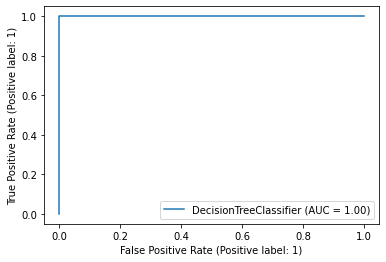

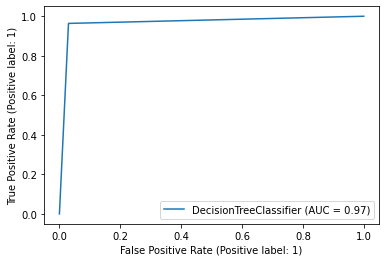

In [21]:
from sklearn.metrics import plot_roc_curve
print(plot_roc_curve(tree1,X_train,y_train))
print(plot_roc_curve(tree1,X_test,y_test))

### 2H

C:\Users\Seanw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Seanw\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


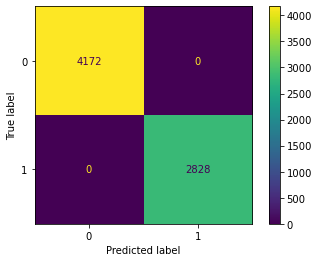

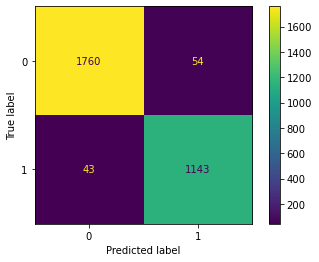

In [22]:
from sklearn.metrics import plot_confusion_matrix
print(plot_confusion_matrix(tree1,X_train,y_train))
print(plot_confusion_matrix(tree1,X_test,y_test))

### 3A

In [23]:
tree1.tree_.max_depth

18

### 3B

In [24]:
error_lst = list()
for i in range(1,tree1.tree_.max_depth):
    cur_tree = DecisionTreeClassifier(max_depth=i)
    cur_tree.fit(X_train,y_train)
    error_lst.append(1 -cur_tree.score(X_test,y_test))

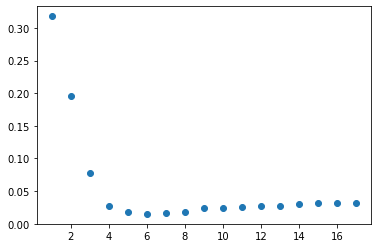

In [25]:
plt.scatter(range(1,tree1.tree_.max_depth),error_lst)

In [26]:
np.argmin(error_lst)

5

### 3C

In [27]:
param_grid = {'max_depth':range(1,tree1.tree_.max_depth),
             'max_features':[0.2,0.4,0.6,0.8]}
cv = GridSearchCV(tree1,param_grid,cv=8)
cv.fit(X_train,y_train)

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 18),
                         'max_features': [0.2, 0.4, 0.6, 0.8]})

In [28]:
cv.best_params_

{'max_depth': 7, 'max_features': 0.8}

### 3D

In [30]:
from sklearn.model_selection import cross_val_score
error_lst2 = list()
for i in range(1,tree1.tree_.max_depth):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    error_lst2.append(cross_val_score(model,X_train,y_train,scoring='accuracy',cv=8))

In [31]:
#find the best accuracy for each cross validation
for i in range(len(error_lst2)):
    error_lst2[i] = 1-np.mean(error_lst2[i])

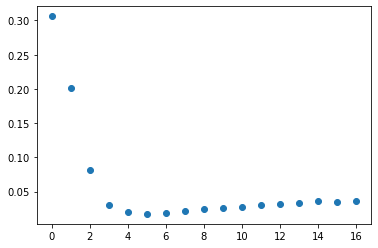

In [32]:
plt.scatter(range(len(error_lst2)),error_lst2)

In [33]:
np.argmin(error_lst2)

5

### 3E

In [38]:
from sklearn.model_selection import validation_curve
# Your tree1 estimator and X, y data
# Define parameter values for max_depth
param_range = range(1, tree1.tree_.max_depth)

# Use validation_curve to get training and validation scores
train_scores, val_scores = validation_curve(estimator=tree1,
                                            X=X, y=y,
                                            param_name='max_depth',
                                            param_range=param_range,
                                            scoring='accuracy',
                                            cv=8)

In [39]:
# Calculate average accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

In [40]:
# Calculate error rates
train_error_rates = 1 - train_scores_mean
val_error_rates = 1 - val_scores_mean

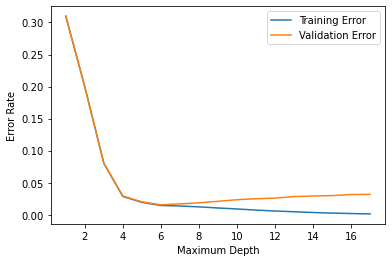

In [41]:
# Plot error rates
plt.plot(param_range, train_error_rates, label='Training Error')
plt.plot(param_range, val_error_rates, label='Validation Error')
plt.xlabel('Maximum Depth')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

In [44]:
# Find optimal maximum depth
optimal_max_depth = param_range[np.argmin(val_error_rates)]
print("Optimal Maximum Depth: ", optimal_max_depth)

Optimal Maximum Depth:  6


### 4A

In [3]:
df = pd.read_csv('heart_data.csv',delimiter=',')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


### 4B

In [4]:
from sklearn.preprocessing import StandardScaler
# Perform standard scaling on all numerical features except the last column
numerical_features = df.columns[:-1]  # Exclude the last column ('quality')

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


### 4C

In [7]:
# Split the data into train and test sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4D

In [11]:
h_tree = DecisionTreeClassifier()
h_tree.fit(X_train,y_train)

from sklearn.ensemble import RandomForestClassifier
h_forest = RandomForestClassifier(n_estimators=25)
h_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=25)

### 4E

In [12]:
tree_param_grid = {'max_depth':range(1,25),
             'max_features':[0.2,0.4,0.6,0.8]}
forest_param_grid = {'n_estimators':[5,10,15,20,25,30,35,40,50,100],
                    'max_depth':range(1,25),
                    'max_features':[0.2,0.4,0.6,0.8]}

In [15]:
tree_cv = GridSearchCV(h_tree,tree_param_grid,cv=8)
tree_cv.fit(X_train,y_train)

forest_cv = GridSearchCV(h_forest,forest_param_grid,cv=8)
forest_cv.fit(X_train,y_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(n_estimators=25),
             param_grid={'max_depth': range(1, 25),
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 50,
                                          100]})

### 4F

In [16]:
tree_cv.best_params_

{'max_depth': 4, 'max_features': 0.6}

In [17]:
forest_cv.best_params_

{'max_depth': 3, 'max_features': 0.2, 'n_estimators': 50}

In [29]:
h_tree_opt = DecisionTreeClassifier(max_depth=4,max_features=0.6)
h_forest_opt = RandomForestClassifier(max_depth=3,max_features=0.2,n_estimators=50)

In [30]:
h_tree_opt.fit(X_train,y_train)
print('Decision Tree Train Acc:', accuracy_score(h_tree_opt.predict(X_train),y_train))
print('Decision Tree Test Acc:',h_tree_opt.score(X_test,y_test))
      
h_forest_opt.fit(X_train,y_train)
print('Forest Train acc:',accuracy_score(h_forest_opt.predict(X_train),y_train))
print('Forest Test acc:',h_forest_opt.score(X_test,y_test))

Decision Tree Train Acc: 0.8611111111111112
Decision Tree Test Acc: 0.7592592592592593
Forest Train acc: 0.875
Forest Test acc: 0.8333333333333334


In [31]:
accuracy_score(h_tree_opt.predict(X_train),y_train)

0.8611111111111112

### 4G

In [ ]:
# g)Discuss about overfitting for both models and, also discuss which model is better for classification for your dataset 
# and why? 